In [1]:
import sys
import scipy.io
import h5py
import numpy as np
from os.path import join as oj
import matplotlib.pyplot as plt
# %matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
import pandas as pd
# from mpl_toolkits.mplot3d import Axes3D
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path

from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn import decomposition
import matplotlib.gridspec as grd
from sklearn import neural_network

import data

%load_ext autoreload
%autoreload 2

In [2]:
data_dir = '/scratch/users/vision/data/stringer_data'
os.listdir(data_dir)

['spont_M160907_MP028_20160926.mat',
 'datadescription.pdf',
 'spont_M161025_MP030_20170623.mat',
 'spont_M161025_MP030_20170616.mat',
 'spont_M170714_MP032_20170804.mat',
 'spont_M150824_MP019_20160405.mat',
 'dbspont.mat',
 'spont_M161025_MP030_20161120.mat',
 'coverFigure.png']

In [3]:
dset = scipy.io.loadmat(oj(data_dir, 'spont_M161025_MP030_20170623.mat'))

In [4]:
dset.keys()
X = dset['Fsp'] # num_neurons x num_timepoints
print(X.shape)

(14752, 24354)


# view some responses

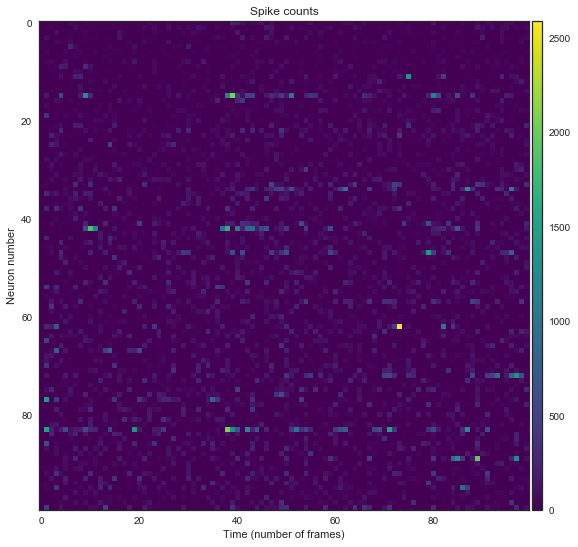

In [5]:
plt.figure(figsize=(16, 9))
ax = plt.gca()
p = plt.imshow(X[:100, :100], interpolation='None', cmap='viridis')
plt.xlabel('Time (number of frames)')
plt.ylabel('Neuron number')
plt.title('Spike counts')

# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(p, cax=cax)

plt.show()

# look at PCs

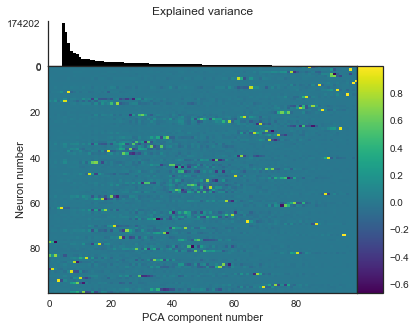

In [10]:
def plot_pcs(pca, comps):

    # create a 2 X 2 grid 
    gs = grd.GridSpec(2, 2, height_ratios=[2,10], 
                      width_ratios=[12, 1], wspace=0, hspace=0)

    try:
        # plot explained variance
        ax2 = plt.subplot(gs[0])
        ax2.bar(np.arange(0, comps.shape[1]), pca.explained_variance_, 
                color='black', width=1)
        plt.title('Explained variance')
        ax2.spines['right'].set_visible(False)
        ax2.spines['top'].set_visible(False)
        ax2.xaxis.set_visible(False)
        ax2.yaxis.set_ticks_position('left')
        ax2.set_yticks([0, max(pca.explained_variance_)])
    except:
        print('not pca')

    # plot pcs
    ax = plt.subplot(gs[2])
    p = ax.imshow(comps, interpolation='None', cmap='viridis',aspect='auto')
    plt.ylabel('Neuron number')
    plt.xlabel('PCA component number')

    # make colorbar
    colorAx = plt.subplot(gs[3])
    cb = plt.colorbar(p, cax = colorAx)

    plt.show()


# perform pca
pca = decomposition.PCA()
# pca = decomposition.NMF()
pca.fit(X[:100].transpose())
comps = pca.components_.transpose()
plt.figure(figsize=(6, 5))
plot_pcs(pca, comps)